# TP3 - Machine Learning
El objetivo de este trabajo es desarrollar y evaluar modelos basados en redes neuronales,incorporando técnicas de ablación para entender el impacto de diversas modificaciones en el proceso de entrenamiento y en la capacidad de generalización del modelo. No se permite usar librerías de machine learning como scikit-learn o PyTorch, a menos que sea pedido explícitamente en el enunciado del ejercicio.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

In [3]:
import sys
import os
# sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')
sys.path.append(os.path.abspath('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/src'))

In [4]:
import models as md
importlib.reload(md)
import preprocessing as pp
importlib.reload(pp)

<module 'preprocessing' from 'c:\\Users\\felic\\OneDrive\\Documentos\\GitHub\\MLyDL_TPs\\Marolda_Felicitas_TP3\\src\\preprocessing.py'>

In [7]:
# Cargar los archivos .npy
X_COMP = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_COMP.npy')
X_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/X_images.npy')
y_images = np.load(r'c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP3/data/y_images.npy')

<Figure size 1500x300 with 0 Axes>

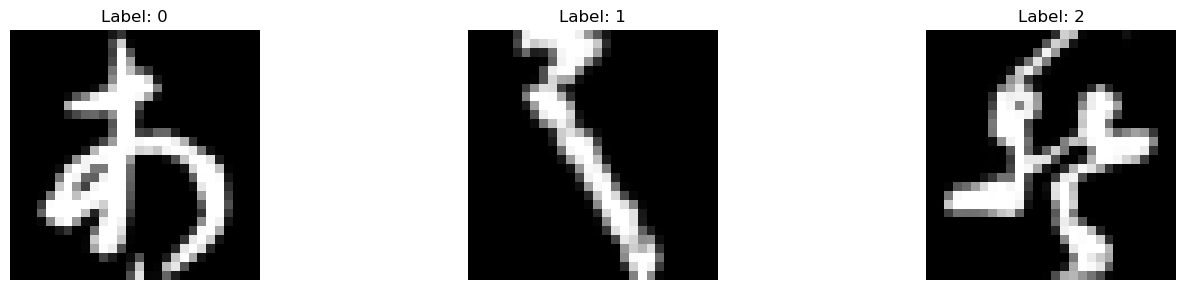

In [10]:
# Visualize a few images from X_images along with their labels from y_images
num_images_to_display = 3
plt.figure(figsize=(15, 3))

# Visualize a few images from X_images with different labels from y_images
unique_labels = set()
selected_indices = []

# Find indices of images with unique labels
for idx, label in enumerate(y_images):
    if label not in unique_labels:
        unique_labels.add(label)
        selected_indices.append(idx)
    if len(selected_indices) == num_images_to_display:
        break

plt.figure(figsize=(15, 3))

for i, idx in enumerate(selected_indices):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(X_COMP[idx].reshape(28, 28), cmap='gray')  # Assuming images are 28x28
    plt.title(f"Label: {y_images[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Dividir el conjunto de datos en tres subconjuntos: Train, Validation y Test

In [ ]:
importlib.reload(pp)
# Split the data into train and temp (temporary set for further splitting)
X_normalized = pp.normalize(X_images)
X_train, X_val, X_test, y_train, y_val, y_test = pp.split_data(X_images, y_images)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (3000, 784)
X_val shape: (1000, 784)
X_test shape: (1000, 784)


### Implementación y Entrenamiento de una Red Neuronal Básica